# Model Comparison

In [24]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [25]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [26]:
# Choose the base setting.
# The loaded data has the following forecasts
SampleSizes = [5]
forecast = [1,2,3,4]

# Which
Forecast_examination_idx = [0,1,2,3] # forecast[Forecast_examination_idx] = 2
SampleSize_examination_idx = [0] # SampleSize[SampleSize_examination_idx] = 5
forecast_idx = forecast[0]
SampleSize_idx = SampleSizes[0]

In [27]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')


In [30]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=4, SampleSizes=SampleSizes)

In [31]:
print(np.shape(Array))

(4, 1, 88, 5, 2)


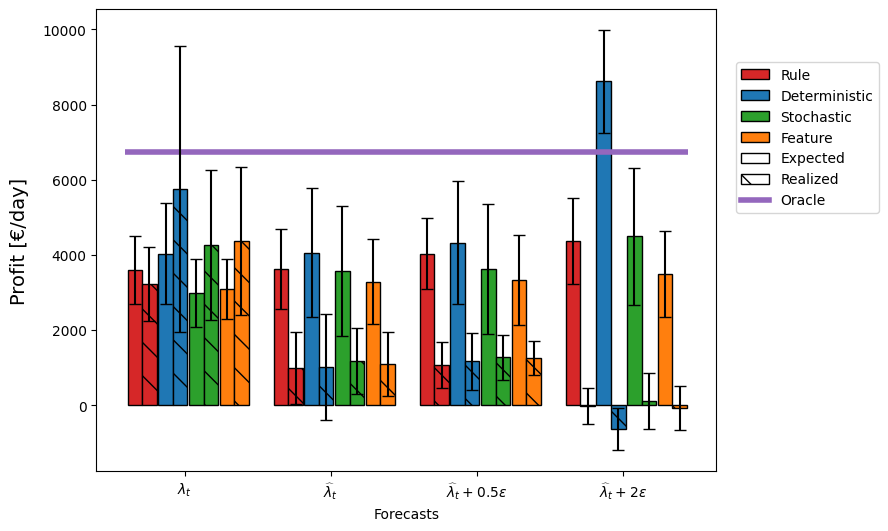

In [38]:
plot_profit_Test(Array,'Forecasts', Forecast_examination_idx, SampleSize_examination_idx, barwidth = 0.1, Forecast_label = ["$\lambda_{t}$","$\widehat{\lambda}_{t}$","$\widehat{\lambda}_{t} + 0.5\epsilon$","$\widehat{\lambda}_{t} + 2\epsilon$"],  ShowEachTestDay = False,save=True)

In [8]:
fixd5 = [f'f{forecast_idx}_d{SampleSize_idx}_upd{d}_t{d+1}' for d in range(0,88)]
print(fixd5)

x_axis = [upd for upd in range(0,88)]
data_RT = df_RT_Profit[fixd5].T
data_Exp = df_Exp_Profit[fixd5].T

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4', 'f1_d5_upd4_t5', 'f1_d5_upd5_t6', 'f1_d5_upd6_t7', 'f1_d5_upd7_t8', 'f1_d5_upd8_t9', 'f1_d5_upd9_t10', 'f1_d5_upd10_t11', 'f1_d5_upd11_t12', 'f1_d5_upd12_t13', 'f1_d5_upd13_t14', 'f1_d5_upd14_t15', 'f1_d5_upd15_t16', 'f1_d5_upd16_t17', 'f1_d5_upd17_t18', 'f1_d5_upd18_t19', 'f1_d5_upd19_t20', 'f1_d5_upd20_t21', 'f1_d5_upd21_t22', 'f1_d5_upd22_t23', 'f1_d5_upd23_t24', 'f1_d5_upd24_t25', 'f1_d5_upd25_t26', 'f1_d5_upd26_t27', 'f1_d5_upd27_t28', 'f1_d5_upd28_t29', 'f1_d5_upd29_t30', 'f1_d5_upd30_t31', 'f1_d5_upd31_t32', 'f1_d5_upd32_t33', 'f1_d5_upd33_t34', 'f1_d5_upd34_t35', 'f1_d5_upd35_t36', 'f1_d5_upd36_t37', 'f1_d5_upd37_t38', 'f1_d5_upd38_t39', 'f1_d5_upd39_t40', 'f1_d5_upd40_t41', 'f1_d5_upd41_t42', 'f1_d5_upd42_t43', 'f1_d5_upd43_t44', 'f1_d5_upd44_t45', 'f1_d5_upd45_t46', 'f1_d5_upd46_t47', 'f1_d5_upd47_t48', 'f1_d5_upd48_t49', 'f1_d5_upd49_t50', 'f1_d5_upd50_t51', 'f1_d5_upd51_t52', 'f1_d5_upd52_t53', 'f1_d5_upd5

In [9]:
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

sto        4264.525647
det        5753.255248
oracle     6733.798103
feature    4369.435957
rule       3214.032620
dtype: float64
sto        2986.811981
det        4033.179007
oracle     6733.798103
feature    3094.624668
rule       3591.666488
dtype: float64


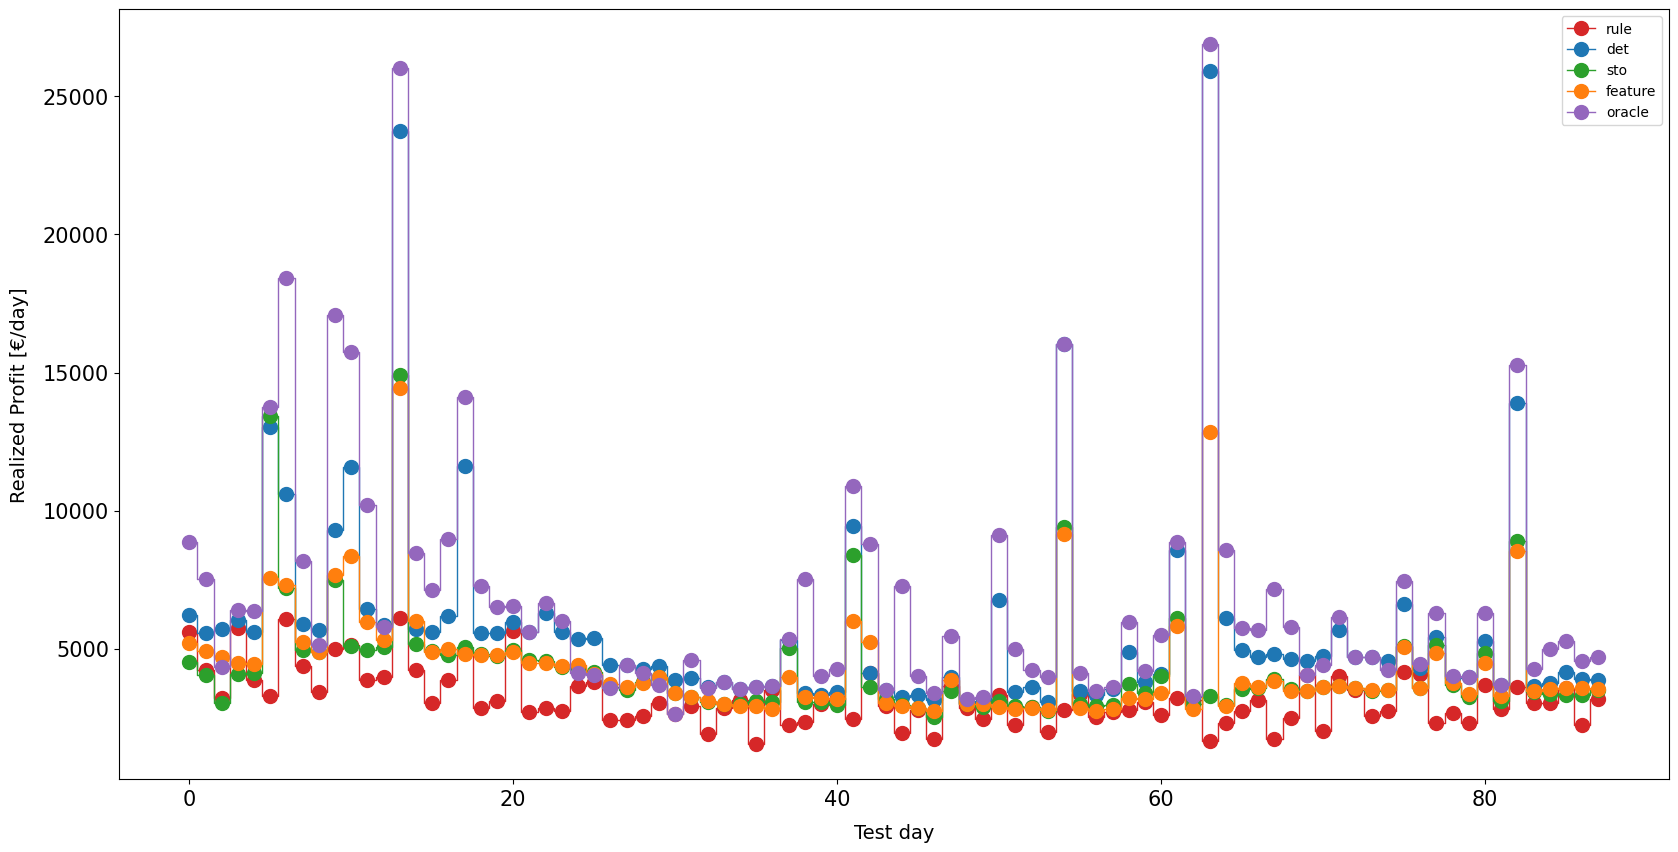

In [10]:
plot_each_test_day_Profit(data_RT,['rule','det','sto','feature','oracle'],x_axis,'steps-mid',save=True)

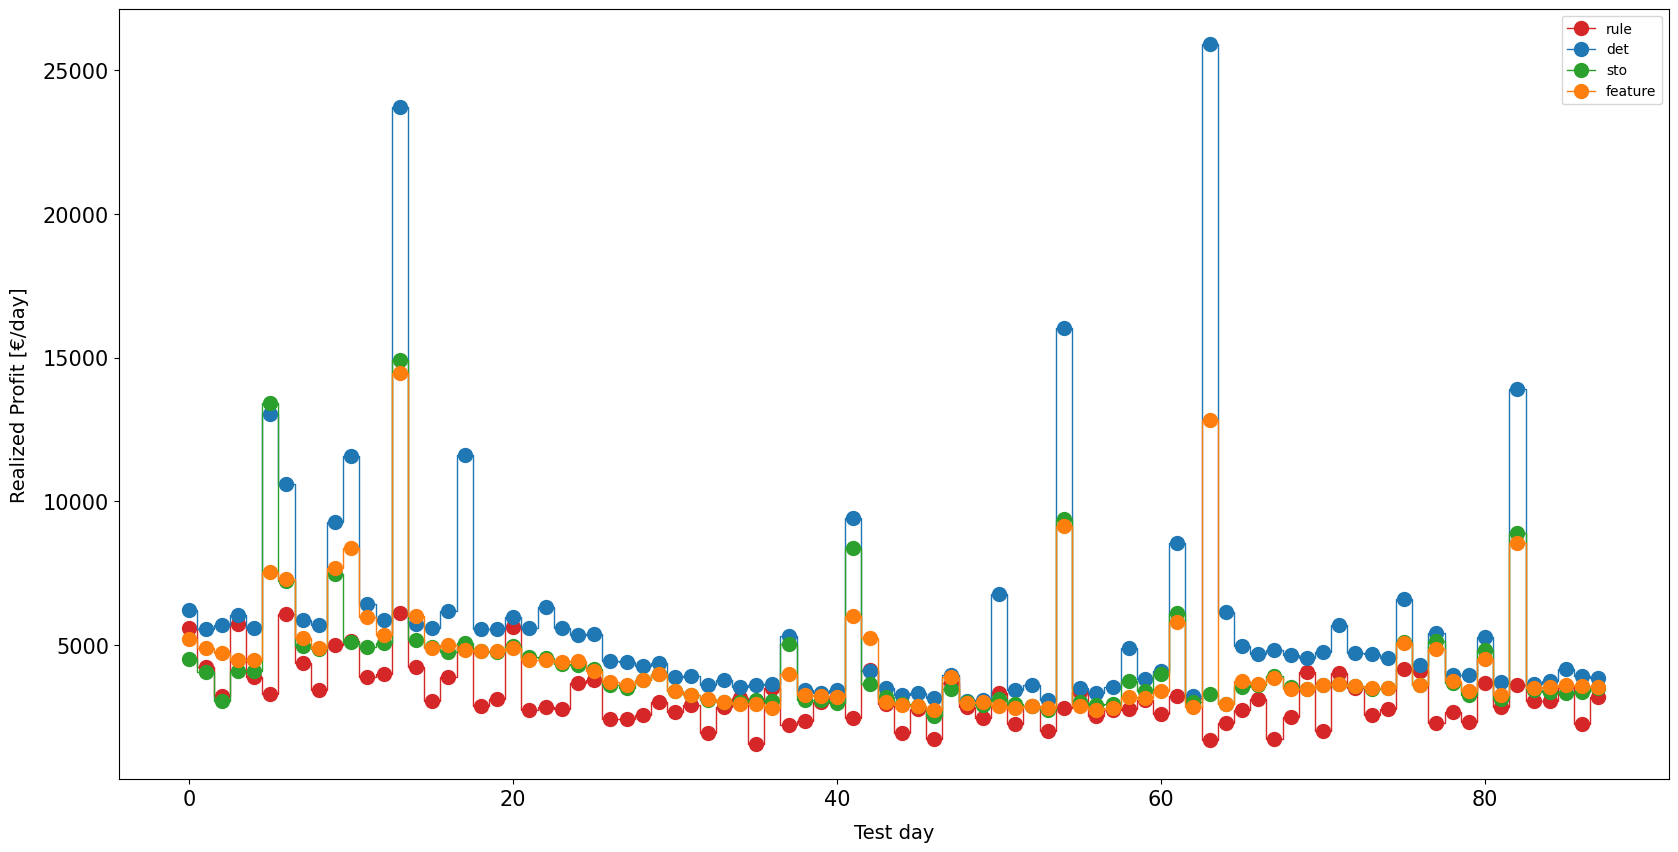

In [11]:
plot_each_test_day_Profit(data_RT,['rule','det','sto','feature'],x_axis,'steps-mid')

### Interesting model behavior cases:

- 0 - 4 (rule is the best)
- 63-65 (det is the best)
- 41,80 (sto is the best)
- 7,14,1581 (fea is best?)



In [12]:
CountArray, model_order,profit_type_order = Count_performance_for_each_model(Array)
print(model_order,profit_type_order)
print(np.shape(CountArray))
print(np.shape(np.sum(CountArray, axis=2)))

['rule', 'det', 'sto', 'feature', 'oracle'] ['Expected', 'RT']
(7, 1, 88, 4, 2)
(7, 1, 4, 2)


In [13]:
CountArray_new  = np.sum(CountArray, axis=2)

In [14]:
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

sto        4264.525647
det        5753.255248
oracle     6733.798103
feature    4369.435957
rule       3214.032620
dtype: float64
sto        2986.811981
det        4033.179007
oracle     6733.798103
feature    3094.624668
rule       3591.666488
dtype: float64


In [15]:
meanRT = df_RT_Profit[fixd5].mean(axis=1)
meanExp = df_Exp_Profit[fixd5].mean(axis=1)

In [16]:
result_summary = [["Expected best", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,0] ],
                    ["Realized best", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,1]  ],
                    ["Expected average", meanExp['rule'],meanExp['det'],meanExp['sto'],meanExp['feature'] ],
                    ["Realized average", meanRT['rule'],meanRT['det'],meanRT['sto'],meanRT['feature'] ]]
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)

+------------------+---------+-----------------+--------------+-----------+
|                  |    Rule |   Deterministic |   Stochastic |   Feature |
+==================+=========+=================+==============+===========+
| Expected best    |   37    |           51    |         0    |      0    |
+------------------+---------+-----------------+--------------+-----------+
| Realized best    |    0    |           85    |         1    |      2    |
+------------------+---------+-----------------+--------------+-----------+
| Expected average | 3591.67 |         4033.18 |      2986.81 |   3094.62 |
+------------------+---------+-----------------+--------------+-----------+
| Realized average | 3214.03 |         5753.26 |      4264.53 |   4369.44 |
+------------------+---------+-----------------+--------------+-----------+


In [17]:
result_summary = [["Expected best", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,0] ],
                    ["Realized best", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,1]  ],
                    ["Expected average \EUR/day", np.round(meanExp['rule']),np.round(meanExp['det']),np.round(meanExp['sto']),np.round(meanExp['feature']) ],
                    ["Realized average \EUR/day", np.round(meanRT['rule']),np.round(meanRT['det']),np.round(meanRT['sto']),np.round(meanRT['feature']) ]]
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]

# Generate LaTeX table code
table_code = "\\begin{table}[h]\n"
table_code += "\\centering\n"
table_code += "\\caption{Summary of Base case Results}\n"
table_code += "\\label{tab:results}\n"
table_code += "\\begin{tabular}{|" + "|".join(["l"] + ["c"] * (len(headers))) + "|}\n"
table_code += "\\hline\n"
table_code += " & " + " & ".join(headers) + " \\\\\n"
table_code += "\\hline\n"

for row in result_summary:
    table_code += " & ".join(str(item) for item in row) + " \\\\\n"

table_code += "\\hline\n"
table_code += "\\end{tabular}\n"
table_code += "\\end{table}"

print(table_code)


\begin{table}[h]
\centering
\caption{Summary of Base case Results}
\label{tab:results}
\begin{tabular}{|l|c|c|c|c|}
\hline
 & Rule & Deterministic & Stochastic & Feature \\
\hline
Expected best & 37 & 51 & 0 & 0 \\
Realized best & 0 & 85 & 1 & 2 \\
Expected average \EUR/day & 3592.0 & 4033.0 & 2987.0 & 3095.0 \\
Realized average \EUR/day & 3214.0 & 5753.0 & 4265.0 & 4369.0 \\
\hline
\end{tabular}
\end{table}


# EXAMINE EXPECTED RESULTS
#### WHY IS RULE BETTER SOMETIMES AND STO AND FEATURE IS NEVER IN EXPECTED??

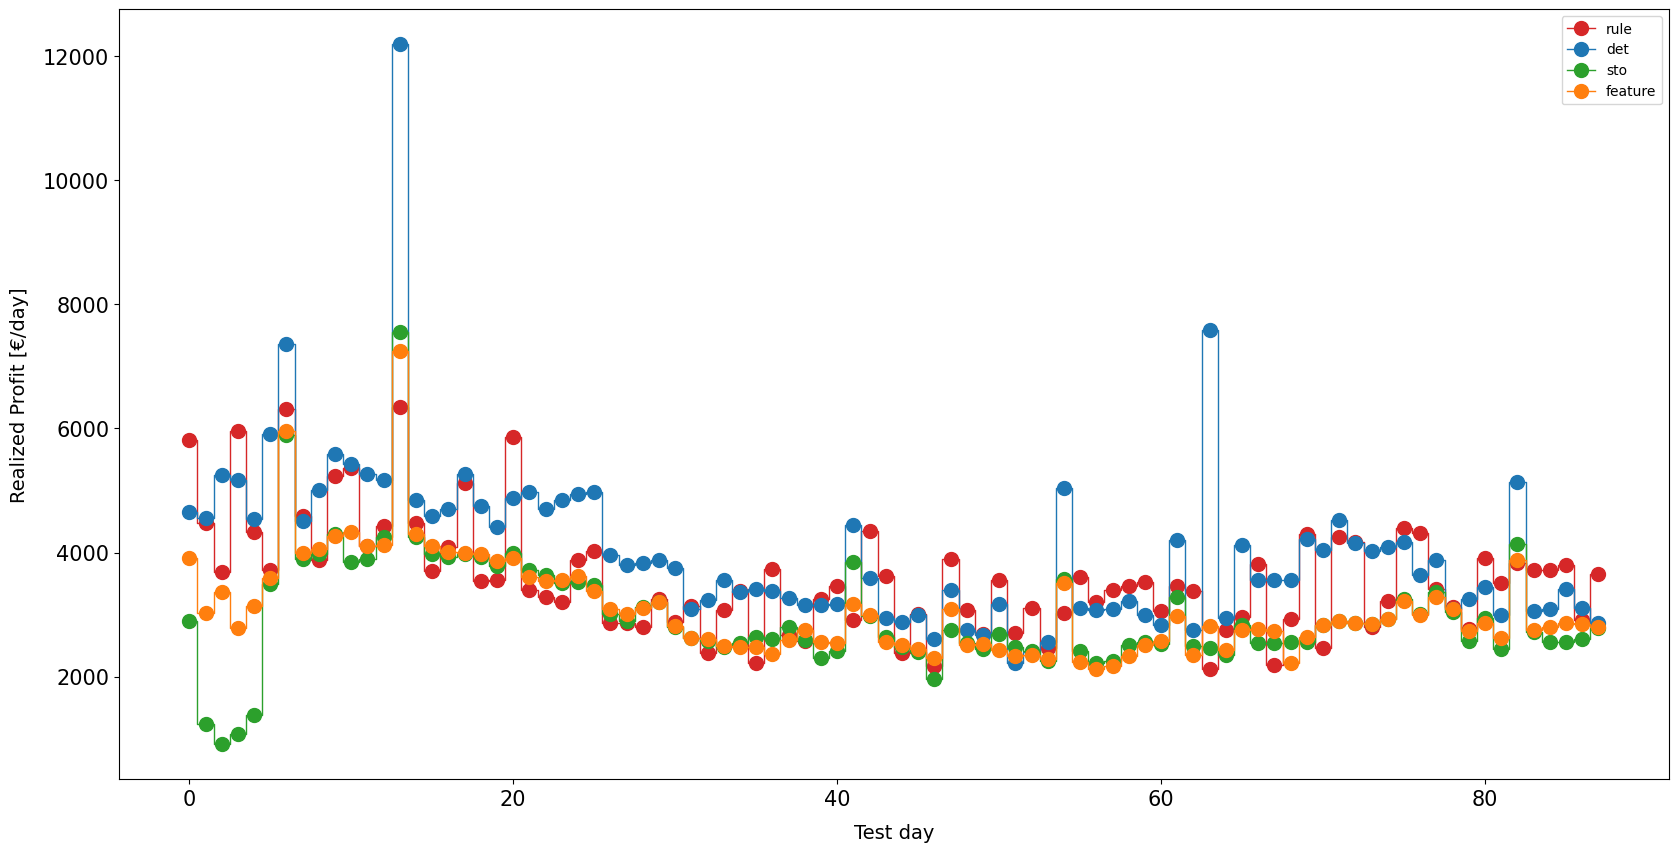

In [18]:
plot_each_test_day_Profit(data_Exp,['rule','det','sto','feature'],x_axis,'steps-mid')

Check on of the days:

In [19]:
f = 1
d = 5

fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(0,4)]
print(fixd5)
x_axis = [upd for upd in range(3,5)]

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4']


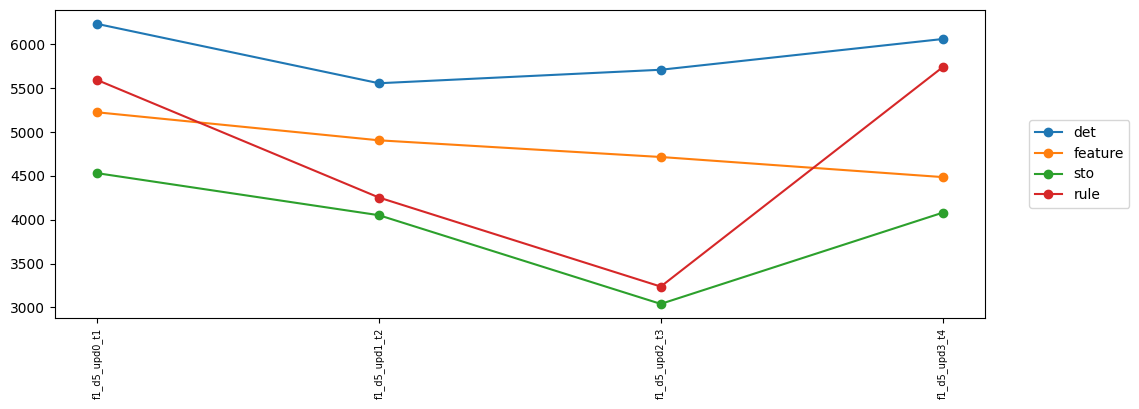

In [20]:
data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT Profit
7) Battery dynamics

### Test case: d5 upd62 t63  
(Where deterministic model has a peak performance)

In [21]:
current_directory

'C:\\Users\\Daniel  BV\\Desktop\\Thesis'

In [22]:
# Select plot parameters
choose_id = fixd5[2]
print(choose_id)
save = True #True or False
model = 'Sto' # Oracle, Rule, Det, Sto, Feature,
Profit_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT Profit)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, Profit_plot);

f1_d5_upd2_t3
Test case:  f1_d5_upd2_t3
+----------+----------+---------+-----------------+--------------+-----------+
|          |   Oracle |    Rule |   Deterministic |   Stochastic |   Feature |
+==========+==========+=========+=================+==============+===========+
| RT       |  4357.18 | 3236.68 |         5710.69 |     3039     |   4715.26 |
+----------+----------+---------+-----------------+--------------+-----------+
| Expected |  4357.18 | 3683.46 |         5246.85 |      909.746 |   3368.44 |
+----------+----------+---------+-----------------+--------------+-----------+


In [23]:
plot_coefficients_heatmap(results['Feature']['Bid'],save = True)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
#View plots
view_plots(model, Profit_plot)


In [ ]:
def bid_train_plots(bid_result, model, color, save):
    #Bid quantity plots with SOC
    # Find dimension to estimate how many plots there should be showed
    #np.shape(bid_result['b_FD1_up_train']) # (d,h)
    num_days = np.size(bid_result['b_FD1_up_train'][:,0]) 
    
    fig, ax = plt.subplots(num_days,figsize=(7,5))
    for i in range(0,num_days):
        x = np.arange(1,25)
        Total = np.zeros(24)

        mask = np.nonzero(bid_result['b_FD1_up_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD1_up_train'][i,mask], label='b_FD1_up', marker='x',s=50, color=color['FD1_up'])
        mask = np.nonzero(bid_result['b_FD2_up_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD2_up_train'][i,mask], label='b_FD2_up', marker='x',s=50, color=color['FD2_up'])
        mask = np.nonzero(bid_result['b_FD1_dn_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD1_dn_train'][i,mask], label='b_FD1_dn', marker='o',s=50, color=color['FD1_dn'])
        mask = np.nonzero(bid_result['b_FD2_dn_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD2_dn_train'][i,mask], label='b_FD2_dn', marker='o',s=50, color=color['FD2_dn'])
        mask = np.nonzero(bid_result['b_DA_dn_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_DA_dn_train'][i,mask], label='b_DA_dn', marker='1',s=50, color=color['DA_dn'])
        mask = np.nonzero(bid_result['b_DA_up_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_DA_up_train'][i,mask], label='b_DA_up', marker='1',s=50, color=color['DA_up'])
        for h in range(0,24):
            Total[h] = bid_result['b_FD1_up_train'][i,h] +  bid_result['b_FD2_up_train'][i,h] + bid_result['b_FD1_dn_train'][i,h] +  bid_result['b_FD2_dn_train'][i,h] + bid_result['b_DA_dn_train'][i,h] + bid_result['b_DA_up_train'][i,h]
        
        ax[i].scatter(x, Total, label='Total', marker='1',s=50, color=color['Total'])
        #ax[i].set_ylabel('Trained Bid quantities [MW]', fontsize=12)
        #ax[i].set_xlabel('Hours', fontsize=12)
    
        # ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2), ncol=3)
        

        ax2 = ax[i].twinx()
        if 'Rule' not in model:
            ax2.plot(x, bid_result['SOC']/6, color=color['SOC'], label='SOC')
        elif 'Rule' in model: #Rule based model gives normalized SOC
            ax2.plot(x, bid_result['SOC'], color=color['SOC'], label='SOC')
        #ax2.set_ylabel('SOC [p.u.]', fontsize=12)
        #ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_ylim(-0.05,1.05)
    # ax2_1.legend(loc='upper right', bbox_to_anchor=(1, -0.1), ncol=3)

    ax[0].set_title(model, fontsize=14) # Remove this when exporting plots for overleaf
    ax[-1].set_xticks([1, 6, 12, 18, 24])
    # Combine the legends
    handles1, labels1 = ax[i].get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=4)

    if save == True:
        plt.savefig(f'Result_plots/bid_trained_plots_{model}.png', bbox_inches='tight')

    plt.show()

In [ ]:
bid_train_plots(results[model]['Bid'], model, color, save)


In [ ]:
# Check forecast alignment
# Select plot parameters
choose_id = fixd5[2]
print(choose_id)
save = True #True or False
model = 'Sto' # Oracle, Rule, Det, Sto, Feature,
Profit_plot = 'Sto' # Rule, Det, Sto, Learn, all (for exp_and_RT Profit)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
#results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, Profit_plot);
#Fix color schemes
color = {'FD2_up': '#FFA500', # orange
        'FD2_dn': '#2986cc', # blue
        'DA_up': '#f44336', # red 
        'DA_dn': 'green', # green
        'FD1_up': '#b26d02', # brown orange
        'FD1_dn': '#674ea7', # darkgreen
        'Total' : 'purple',
        'SOC': 'black'}

bid_result = import_test_case(current_directory, Add_on_path, choose_id)

# Check forecast alignment


In [ ]:
bid_result[model]["Bid"].keys()
bid_result[model]["Bid"]["f_lambda_FD1_up_mean"]
bid_result[model]["Bid"]["f_lambda_FD1_up"]

# Check the bid for Feature

In [ ]:
Feature_Selection = ["Spot", "FD1_down","FD2_down","FD1_up","FD2_up"]
print(np.shape(bid_result["Feature"]['Bid']['X_f'][:,:,:]))
print(np.shape(bid_result["Feature"]['Bid']['X'][:,:,:]))
for f,feature in enumerate(Feature_Selection):
    print(feature)
    print(bid_result["Feature"]['Bid']['X'][f,5,:]-bid_result["Feature"]['Bid']['X_f'][f,:,:])
#bid_result["Feature"]['Bid']['X_f']


In [ ]:
print(np.shape(bid_result["Feature"]['Bid']['q_DA_dn'][:,:]))